<a href="https://colab.research.google.com/github/rahul-727/SPR-/blob/main/2348544_Lab5_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

Signal 1 (Reference): A sampled version of “hello" spoken at a normal pace

Signal 2 (Test): A sampled version of "hello" spoken more slowly.

In [2]:
signal_1 = [0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2]
signal_2 = [0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2]

Plot both speech signals

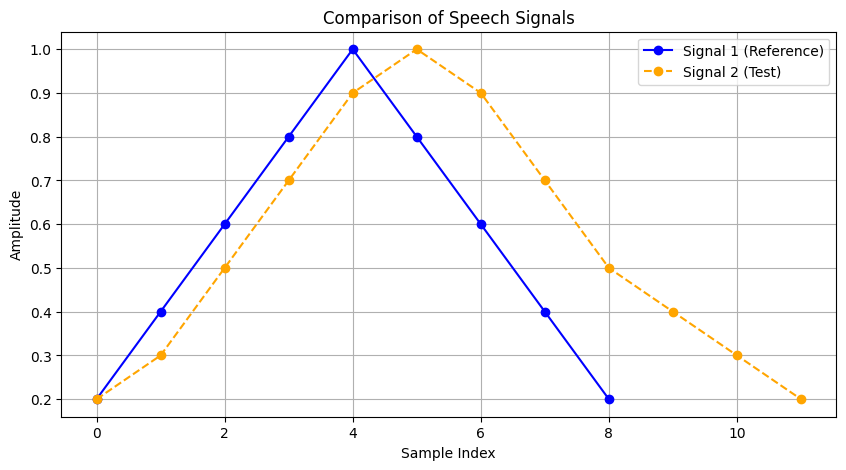

In [3]:
# Generate indices for plotting
indices_1 = np.arange(len(signal_1))
indices_2 = np.arange(len(signal_2))

plt.figure(figsize=(10, 5))
plt.plot(indices_1, signal_1, marker='o', label='Signal 1 (Reference)', linestyle='-', color='blue')
plt.plot(indices_2, signal_2, marker='o', label='Signal 2 (Test)', linestyle='--', color='orange')

plt.title("Comparison of Speech Signals")
plt.xlabel("time duration")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

* from this plot we can see that signal 1 (represting word hello) has a shorter duration and fewer samples compared to signal 2

* signal(represnting word hello spoken more slowly) has a longer duration and more samples indicating a slower speech rate

* looking at the amplitude variation both signal exhibit similar patterns reflecting pronounciation of word hello

Linear Time Normalization for the two sequences

Linear Time Normalization adjusts the time indices of Signal 2 so that its duration matches that of Signal 1 while preserving the relative shapes of its features.

In [5]:
# Original and target indices
indices_2 = np.linspace(0, len(signal_2) - 1, len(signal_2))  # Original indices of Signal 2
target_indices = np.linspace(0, len(signal_2) - 1, len(signal_1))  # Target indices to match Signal 1

# Interpolate Signal 2
interpolator = interp1d(indices_2, signal_2, kind='linear')
normalized_signal_2 = interpolator(target_indices)

print("Normalized Signal 2:", normalized_signal_2)

Normalized Signal 2: [0.2    0.375  0.65   0.9125 0.95   0.725  0.475  0.3375 0.2   ]


This section performs linear time normalzation for signal 2 to match lenghth of signl 1

* interpolation  resample Signal 2 so that it matches the time scale of Signal 1

Compute the alignment between Signal 1 and the normalized Signal 2

In [6]:
alignment = list(zip(range(len(signal_1)), range(len(normalized_signal_2))))
print("Alignment Path:", alignment)

Alignment Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]


Plot the alignment path

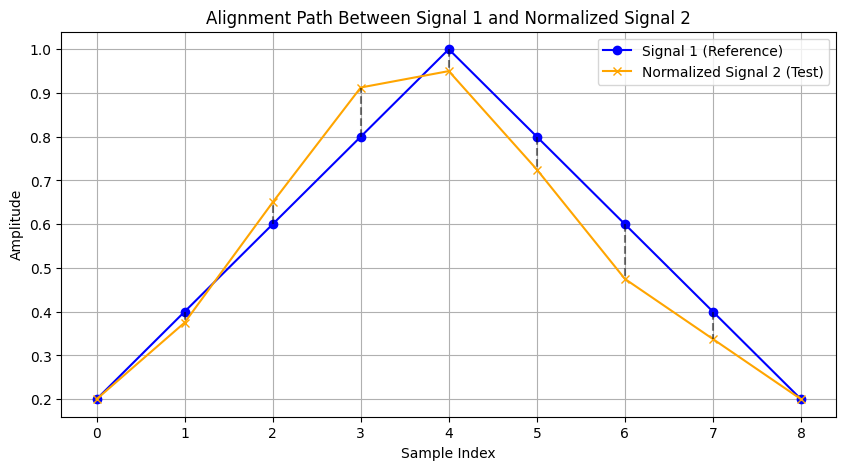

In [7]:
plt.figure(figsize=(10, 5))

# Plot individual signals
plt.plot(indices_1, signal_1, marker='o', label='Signal 1 (Reference)', color='blue')
plt.plot(indices_1, normalized_signal_2, marker='x', label='Normalized Signal 2 (Test)', color='orange')

# Add alignment lines
for i, (s1_idx, s2_idx) in enumerate(alignment):
    plt.plot([s1_idx, s1_idx], [signal_1[s1_idx], normalized_signal_2[s2_idx]], 'k--', alpha=0.5)
plt.title("Alignment Path Between Signal 1 and Normalized Signal 2")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

the plot visually depicts the alignment achieved by time normalization

while the alignement path indicates one to one mapping between signal 1 and the normalized signal 2, the plot shows difference in amplitude between the two signal at several points

* LTN only adjusts the timing (length) of Signal 2 to match Signal 1. It ensures that the indices of both signals are aligned but doesn't alter the amplitudes of Signal 2
* Signal 2's amplitude pattern may not perfectly match Signal 1 even after normalization. This can be due to how the original "hello" was spoken with different intonation or emphasis.